In [1]:
import numpy as np
import coffea.hist as hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
# Make SR and CR dataset
x_hist = np.random.normal(0,size=10000)
mask = abs(x_hist) > 1

CR_hist = x_hist[mask]
SR_hist = x_hist[~mask]

In [3]:
# Define histogram:  Multiple regions with multiple Cat
histo = hist.Hist("Counts",
                  hist.Cat("dataset", "dataset"),
                  hist.Cat("region","region"),
                  hist.Bin("h1", "h1 value", 50, -5, 5),
                 )

In [4]:
# Define Multiple regions
regions = ['SR','CR']
variable1 = {'SR': SR_hist, 'CR': CR_hist}

In [5]:
# Loop over regions and fill hist
for region in regions:
    histo.fill(dataset='dataset',region=region, h1=variable1[region])

In [6]:
plt.rcParams["figure.figsize"] = (8,8)

Text(0.5, 1.0, 'Signal region')

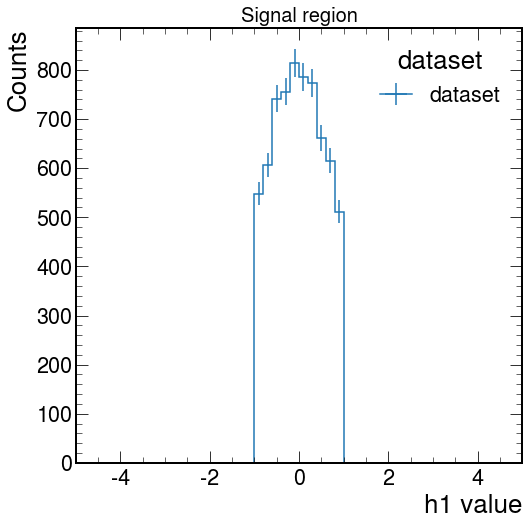

In [7]:
hist.plot1d(histo['dataset'].integrate('region','SR'))
plt.title('Signal region',fontsize=20)

Text(0.5, 1.0, 'Control region')

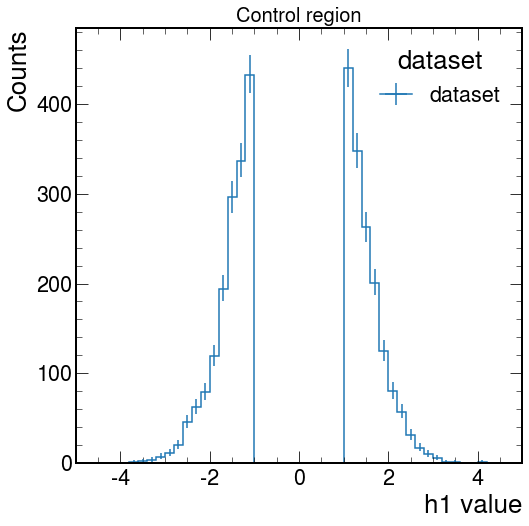

In [8]:
plt.close()
hist.plot1d(histo['dataset'].integrate('region','CR'))
plt.title('Control region',fontsize=20)

In [16]:
for i,j in histo['dataset'].integrate('region','SR').values().items():
    print(i,sum(j))

('dataset',) 6810.0


In [17]:
for i,j in histo['dataset'].integrate('region','CR').values().items():
    print(i,sum(j))

('dataset',) 3190.0
